<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Luis Picón.
- Nombre de alumno 2: Israel Astudillo M.


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/IsraPKMNPAP/Laboratorio-de-Herramientas)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

> 1. Apache Spark es un motor de procesamiento de datos masivos unificado, orientado al análisis de datos y la eficiencia procesando grandes cantidades de datos. Este motor se puede acceder en Python a través de PySpark, que es una librería que compatibiliza el lenguaje con el motor. Tiene la ventaja principal de ser eficiente y rápido trabajando grandes cantidades de datos, así como facilitar el stream de datos entre distintos procesos. 
> 2. Un RDD en Spark es una estructura de datos que se caracteriza por estar distribuida en distintas máquinas y es la base de las operaciones que Spark permite realizar. Su principal característica es la distribución de sus partes en distintas máquinas que le da la propiedad de paralelismo de operaciones y aumento en general de la velocidad de procesamiento. Se relacionan con los DataFrames en que sirven de estructura fundamental para estos y funcionan como abstracción de mas alto nivel de los RDD optimizadas para consultas.
> 3. Una transformación es una especie de operación que transforma un datafrme en otro nuevo (sin modificar el original) que Spark guarda internamente para ejecutar luego en las acciones de Spark (perezosas), las cuales desencadenan las transformaciones en cola. Un ejemplo de transformación es filter() función de filtrado de dataframes y uno de acción es save() que guarda un dataframe en algún tipo de almacenamiento externo. Cuando se ejecuta una acción se desencadena la operación de toda la cola de transformaciones, organizadas en una secuencia optimizada que mejora finalmente la eficiencia en ejecución y tiempo de procesamiento.
> 4. El particionamiento de datos permite a Spark distribuir el procesamiento de distintas tareas en varias máquinas de manera de acelerar el procesamiento de datos a través de operaciones en paralelo en las distintas máquinas distribuidas. Esto tiene finalmente efecto sobre el rendimiento para grandes cantidades de datos, donde las operaciones mismas a realizar son las que más demandan en términos computacionales por sobre reagrupar la data separada.
> 5. El driver es el gestor que instancia la sesión que se encarga de administrar y solicitar los recursos necesarios para la ejecución de las tareas, que a su vez también transforma a grafos acíclicos. El executor opera en cada nodo de trabajo dentro del clúster llevando a cabo las tareas asignadas por el conductor o cluster manager.
> 6. Catalyst Optimizer es el optimizador detrás del motor de SQL que ofrece Spark para ejecutar consultas SQL. Su función principal es de optimización de consultas a través de una secuencia de pasos que mejor utiliza los recursos de Spark para ejecutar las consultas.


## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
import os
os.environ["JAVA_HOME"] = r"C:/Program Files/Java/jdk-22/"


In [2]:
# Libreria Core del lab.
!pip install pyspark

import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px


print(pd.__version__)


You should consider upgrading via the 'C:\Users\lpico\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)


You should consider upgrading via the 'C:\Users\lpico\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\lpico\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
2.2.2


Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [3]:
# Creamos sesión
sparksession = SparkSession.builder.master("local").appName("Dataframes").getOrCreate()

In [4]:
# Leemos el DF
df = (
    sparksession.read
    .format("parquet")
    .load("C:/Users/lpico/Documents/Repositorio-papayon/datos_lab_spark.parquet")
)

In [5]:
# Mostramos
df.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [6]:
# Escriba su respuesta aquí
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [7]:
# Mostramos las primeras 10 filas
df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [8]:
# Sampleo de 5% de los datos y lo mostramos
df.sample(fraction=0.05,seed=30).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|                NULL|339683a0-3028-449...|            475.76|2023-09-04 00:00:00|        PayPal|            NULL|     2.0|        29.0|      Muellerstad|     mobile|  196.101.90.48|3496 

In [9]:
# Mostramos los tipos de datos de las columnas
df.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

Las variables de tipo no apropiado pueden ser consideradas de distintas formas dependiendo de las transformaciones o tipos de variables que queramos utilizar. Por ejemplo 'Payment Method', 'Product Category' y 'Device Used' pueden ser consideradas variables categóricas, tipo de variable que no existe como el tipo 'category' de pandas. Sin embargo, existen formas de numerizar las categorías para tratarlas como variables numéricas discretas. Por otro lado 'Quantity', 'Customer Age' y 'Account Age Days' son variables que toman valores enteros y en estricto rigor debiesen ser variable de tipo numéricas enteras. También 'Is An Alien' debiese ser una variable binaria, dado que solo reporta dos valores.

In [10]:
# Importamos los tipos de variables
from pyspark.sql.types import IntegerType, BooleanType 

# Diccionario de tipos de variables a cambiar
dic = {"Quantity": IntegerType(),"Customer Age": IntegerType(),"Is An Alien": BooleanType(),"Account Age Days": IntegerType()}

# Función de cambio de tipos de variables
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        print(col_name)
        print(new_type)
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df

In [11]:
# Utilizamos la función
df = cast_columns(df,dic)
# Verificamos que funcione
df.printSchema()

Quantity
IntegerType()
Customer Age
IntegerType()
Is An Alien
BooleanType()
Account Age Days
IntegerType()
root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: boolean (nullable = true)
 |-- Account Age Days: integer (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [12]:
df.sample(fraction=0.05,seed=30).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|                NULL|339683a0-3028-449...|            475.76|2023-09-04 00:00:00|        PayPal|            NULL|       2|          29|      Muellerstad|     mobile|  196.101.90.48|3496 

In [13]:
# Contamos cantidad de nulos por columna

# Importamos las funciones de consulta SQL

from pyspark.sql.functions import when, col, sum

exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]

df.agg(*exprs).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [14]:
row_count = df.count()
print(row_count)

600000


Es más de un sexto de la data de solo nulos por columna.

In [15]:
# Filas que obtendríamos al borrar nulos
df.na.drop().count()

13388

In [16]:
row_count = df.count()
print(row_count)

600000


In [17]:
# Borramos los nulos
df = df.na.drop()

In [18]:
row_count = df.count()
print(row_count)

13388


Descenso drástico de la cantidad de elementos, lo cual nos dice que los nulos están distribuidos en distintas columnas.

In [19]:
print(df.count())
df.sample(fraction=0.05,seed=30).show()

13388
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|  Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|e943cea0-cf5b-4c4...|fdc52935-83be-46b...|            256.72|2021-01-16 00:00:00|   credit card|    toys & games|       3|          34|     North Kristina|     tablet|   173.

In [20]:
# Número de duplicados
df.dropDuplicates().count()

13388

In [21]:
# Borramos datos duplicados
df = df.dropDuplicates()

In [22]:
print(df.count())
df.sample(fraction=0.05,seed=30).show()

13388
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|95c9588e-e338-465...|9e56830c-04a3-42e...|             89.65|2019-07-21 00:00:00|        PayPal| health & beauty|       5|          24|        South Lisa|     mobile|147.143.252

In [23]:
#sparksession.stop()

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [24]:
# Escriba su respuesta aquí

# Paquetes
from pyspark.sql.functions import abs, log
from pyspark.sql.functions import month
from pyspark.sql.functions import when

# Agregamos columna "Transaction bp"
df=df.withColumn('Transaction bp',log(48+abs(df['Transaction Amount']**36)))

# Agregamos "Transaction Month"
df=df.withColumn('Transaction Month',month(df['Transaction Date']))

# Agregamos variable "Type of purchase"
df = df.withColumn("Type of purchase", when(df["Quantity"] <= 4, "Compra minorista").otherwise("Compra mayorista"))

# Imprimimos las compras mayoristas de aliens
mayorista_alien = df.filter((df["Type of purchase"]=="Compra mayorista")&(df["Is An Alien"]==True))
mayorista_alien.show(5)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|95c9588e-e338-465...|9e5

In [25]:
# Agrupamos por Is An Alien y contamos Transaction ID
df_compras = df.groupBy('Is An Alien').agg(
    {
        'Transaction ID':'count',
    }
)
df_compras.show()

+-----------+---------------------+
|Is An Alien|count(Transaction ID)|
+-----------+---------------------+
|       true|                  688|
|      false|                12700|
+-----------+---------------------+



In [26]:
#Agrupamos por método de pago (Payment method), promediamos el monto de transacción (Transaction Amount) y pivoteamos por Is An Alien.
df_pivot = df.groupBy("Payment method").pivot("Is An Alien").mean("Transaction Amount")
df_pivot.show()

+--------------+------------------+-----------------+
|Payment method|             false|             true|
+--------------+------------------+-----------------+
|    debit card|215.21641883519177|547.1965168539325|
| bank transfer|215.15149230285897|547.6004624277457|
|        PayPal|  215.125985847539|469.5177647058822|
|   credit card| 206.3112232704393| 517.753053892216|
+--------------+------------------+-----------------+



### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

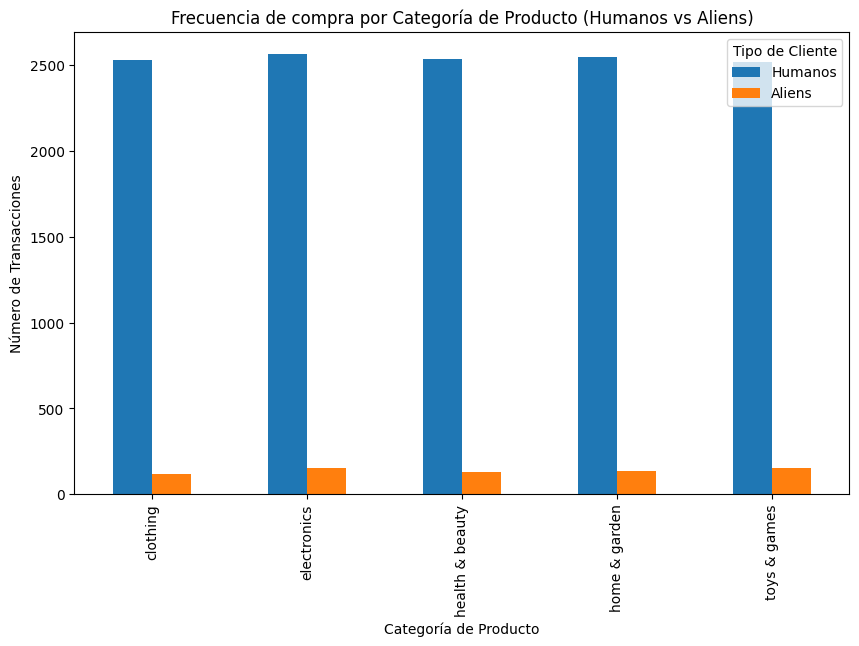

In [27]:
# Escriba su respuesta aquí

# Conversión del DataFrame a formato Pandas
df_pandas = df.toPandas()
df_pandas.head(10)

# Agrupamos por 'Is An Alien' y'Product Category' 
frecuencia_producto = df_pandas.groupby(['Product Category', 'Is An Alien']).size().unstack()

# Creamos el gráfico de barras
frecuencia_producto.plot(kind='bar',figsize=(10, 6))

plt.title('Frecuencia de compra por Categoría de Producto (Humanos vs Aliens)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de Transacciones')
plt.legend(title='Tipo de Cliente', labels=['Humanos', 'Aliens'])
plt.show()

En este primer gráfico, podemos observar claramente una diferencia en la cantidad de productos comprados por humanos y por Aliens, siendo los humanos quienes compran más productos en todas las categorías de productos.

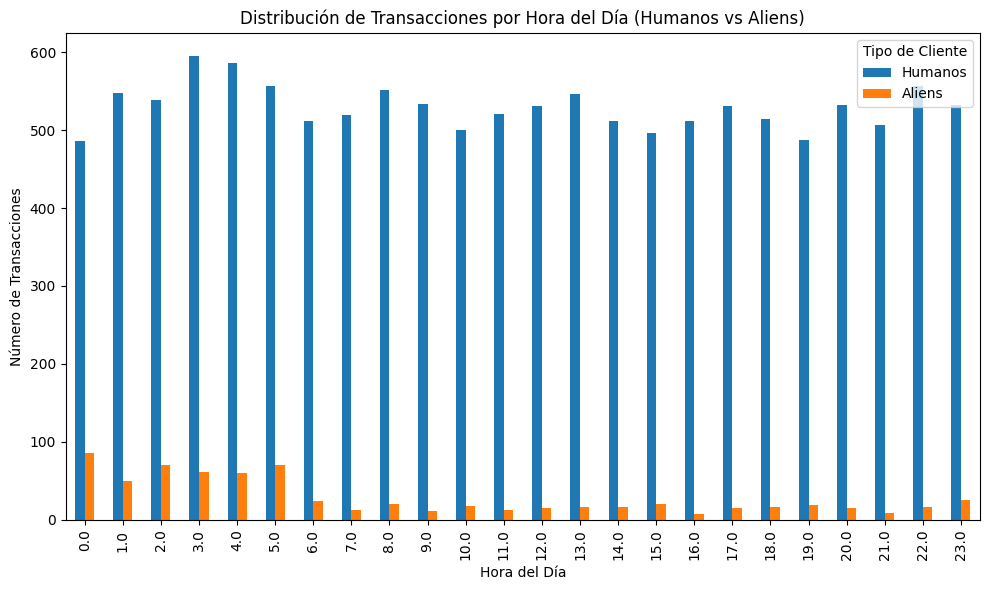

In [28]:
# Agrupamos por 'Is An Alien' y 'Transaction Hour' 
frecuencia_hora = df_pandas.groupby(['Transaction Hour', 'Is An Alien']).size().unstack()

# Creamos el gráfico de barras 
frecuencia_hora.plot(kind='bar', figsize=(10, 6))

plt.title('Distribución de Transacciones por Hora del Día (Humanos vs Aliens)')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Transacciones')
plt.legend(title='Tipo de Cliente', labels=['Humanos', 'Aliens'])

# Ajustamos la figura
plt.tight_layout()

plt.show()


De esta segunda gráfica podemos notar que existe un comportamiento oscilatorio en la frecuencia de compras hechas por humanos a medida que van pasando las horas del día, siendo las 3 a.m la hora en la que los humanos realizan la mayor cantidad de transacciones durante el día.
Por otro lado, observamos que los aliens realizan una mayor cantidad de transacciones durante las 5 primeras horas del día (desde las 00:00 hasta las 05:00 a.m) y durante el resto del día, también se puede observar un comportamiento oscilatorio en la frecuencia de compra de estos, pero en menor magnitud con respecto a los humanos.

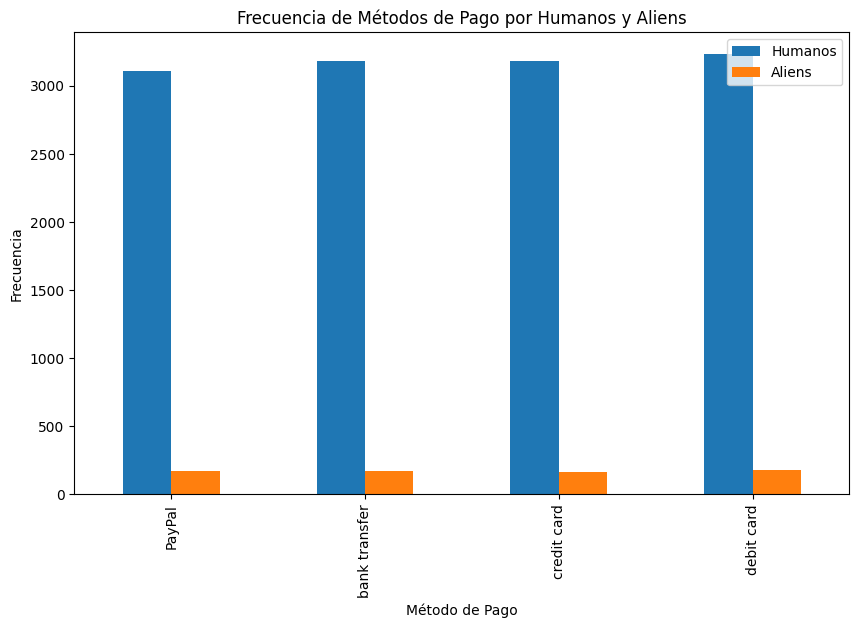

In [29]:
# Agrupamos por 'Is An Alien' y 'Payment Method' 
frecuencia_metodo = df_pandas.groupby(['Payment Method', 'Is An Alien']).size().unstack()

# Creamos el gráfico de barras
frecuencia_metodo.plot(kind='bar', figsize = (10,6))
plt.title('Frecuencia de Métodos de Pago por Humanos y Aliens')
plt.xlabel('Método de Pago')
plt.ylabel('Frecuencia')
plt.legend(['Humanos', 'Aliens'])
plt.show()

Con respecto a la frecuencia de compra, diferenciando por método de pago, notamos que no existe una diferencia significativa entre los distintos métodos de pago usados por los humanos ni tampoco al comparar la frecuencia de compra por método de pago en los aliens.

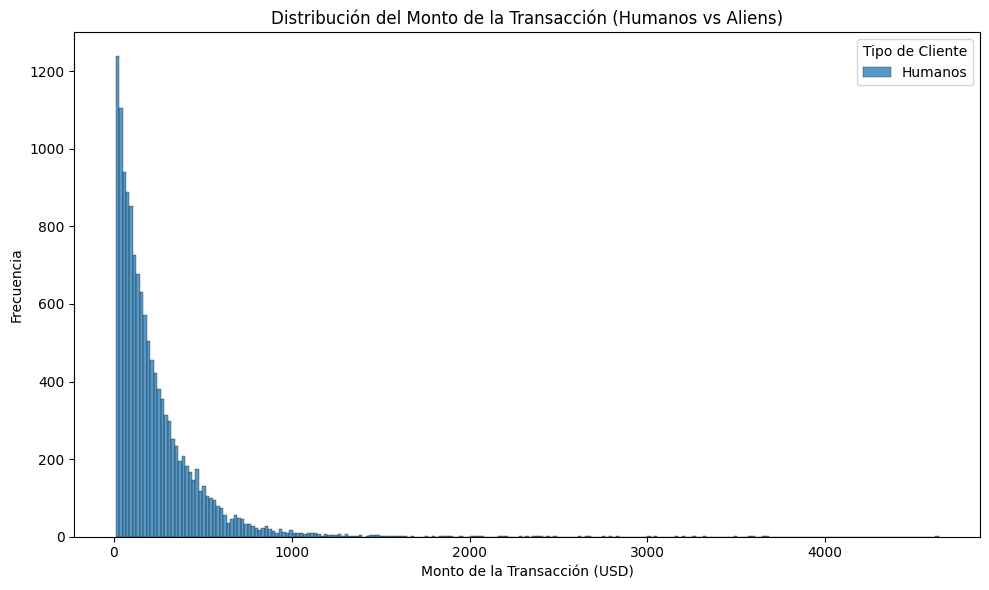

In [30]:
# Importamos seaborn para graficar los histplots
import seaborn as sns
 


# Distribución de la variable 'Transaction Amount'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pandas, x='Transaction Amount')#, hue='Is An Alien', kde=True)
plt.title('Distribución del Monto de la Transacción (Humanos vs Aliens)')
plt.xlabel('Monto de la Transacción (USD)')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Cliente', labels=['Humanos', 'Aliens'])
plt.tight_layout()
plt.show()

La primera variable a analizar es 'Transaction Amount', de la gráfica podemos notar que una gran cantidad de transacciones se realizan por un monto relativamente bajo (~ 100 USD) en humanos y aliens, luego, la cantidad de transacciones va disminuyendo rápidamente a medida que el monto total es mayor, hasta ser prácticamente 0 luego de los $1000 USD

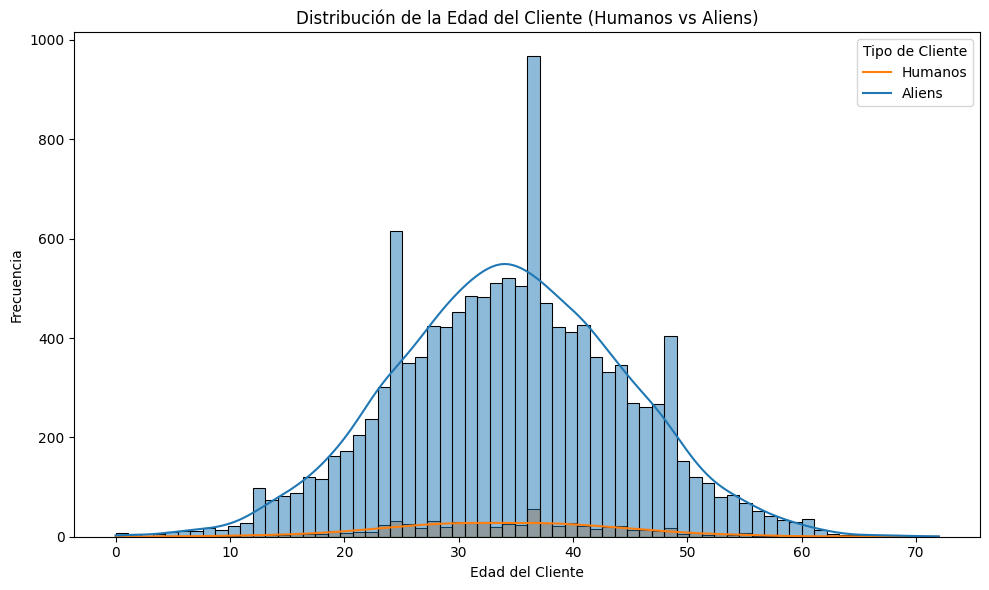

In [31]:
# Distribución de la variable de Edad del Cliente
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pandas, x='Customer Age', hue='Is An Alien', kde=True)
plt.title('Distribución de la Edad del Cliente (Humanos vs Aliens)')
plt.xlabel('Edad del Cliente')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Cliente', labels=['Humanos', 'Aliens'])
plt.tight_layout()
plt.show()


De esta gráfica podemos rescatar dos cosas interesantes: la primera es que la variable edad, tanto de los humanos como de los aliens que han realizado algún tipo de transacción sigue una distribución bastante parecida a una distribución normal, donde la distribución para ambos tipo de clientes está centrada en los 35 años aproximadamente. La segunda es que, con respecto a los humanos, se logra observar en la distribución algunas edades que 'se escapan' de la distribución.Las edades 25, 37 y 49 parecen mostrar una frecuencia mayor a lo esperado por el comportamiento que sigue en general esta variable, siendo la edad de 37 la que más se 'escapa' de la distribución y la que más transacciones tiene registradas.

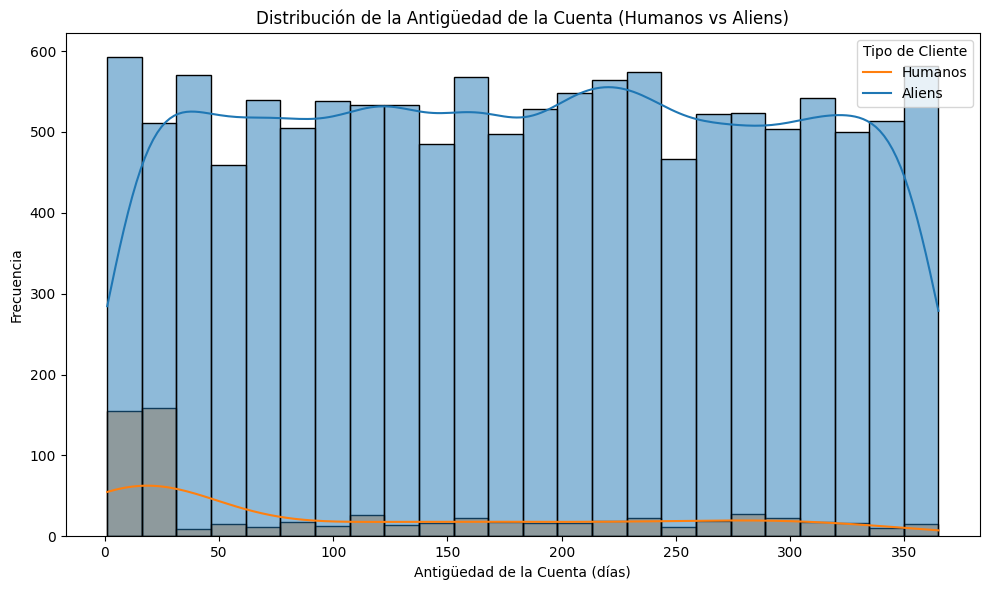

In [32]:
# Distribución de la variable 'Account age Days'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pandas, x='Account Age Days', hue='Is An Alien', kde=True)
plt.title('Distribución de la Antigüedad de la Cuenta (Humanos vs Aliens)')
plt.xlabel('Antigüedad de la Cuenta (días)')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Cliente', labels=['Humanos', 'Aliens'])
plt.tight_layout()
plt.show()

Al analizar este gráfico, con respecto a los humanos, notamos que la frecuencia de transacciones es relativamente constante entre las 450 y 600 transacciones al considerar la antiguedad de la cuenta al momento de realizar la transacción, esto indica un alto nivel de lealtad de los clientes, ya que los clientes con cuentas más antiguas muestran un mismo nivel de transacciones que los nuevos clientes.
Con respecto a los aliens, algo interesante de ver es que una gran cantidad de transacciones es realizada por cuentas de no más de 25 días de antiguedad, es decir, clientes (aliens) que nunca han comprado antes en la tienda y que por alguna razón están llegando en más cantidad a la tienda.

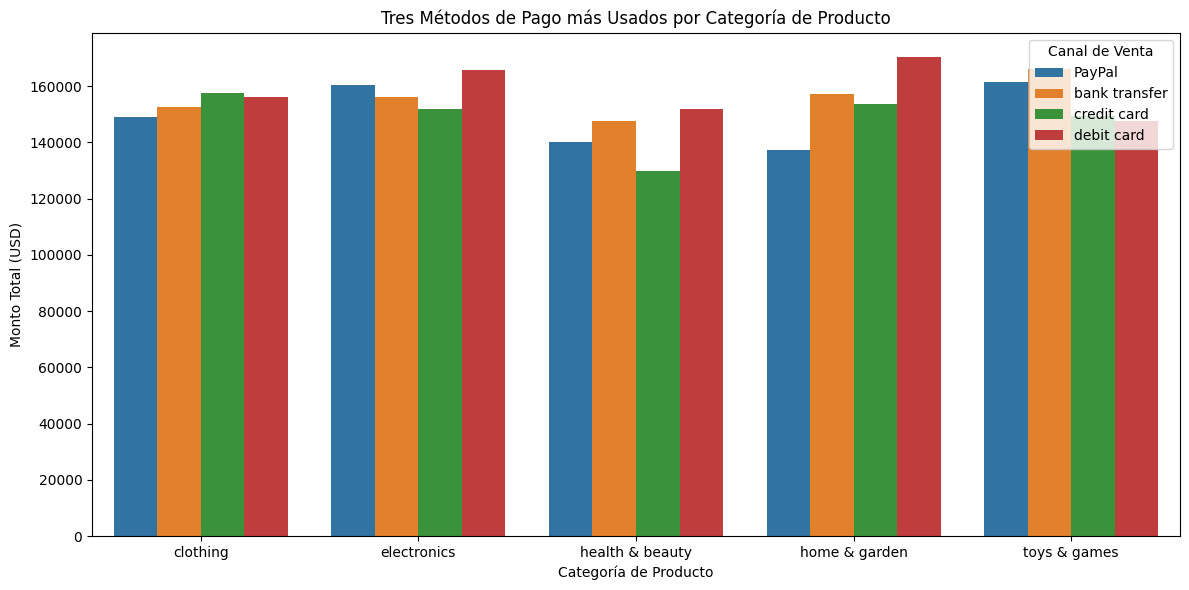

In [33]:
# Agrupamos por categoría de producto y canal de venta para luego contar la cantidad de productos vendidos
venta_total_canal = df_pandas.groupby(['Product Category', 'Payment Method'])['Transaction Amount'].sum().reset_index()

# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=venta_total_canal, x='Product Category', y='Transaction Amount', hue='Payment Method')
plt.title('Tres Métodos de Pago más Usados por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Monto Total (USD)')
plt.legend(title='Canal de Venta')
plt.tight_layout()
plt.show()

De la gráfica anterior, donde se muestra el monto total por de las transacciones realizadas por categoría de producto y además por método de pago, notamos que la categotía health y beauty es la categoría con menor cantidad de dinero transaccionado considerando todos los métodos de pago, además, tanto para esta categoría como para la categoría "home y garden" y "electronics", el método de pago más utilizado es la tarjeta de débito.

### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [34]:
# Código Aquí

### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [35]:
# Código Aquí